Plotting node degree histogram easily
_From Hands-On Graph Neural Networks Using Python_ by Maxime Labonne. Chapter 6

Implementation by Mike Goodrich
Brigham Young University

July 2023

Using graph from https://networkrepository.com/ENZYMES8.php

     The Network Data Repository with Interactive Graph Analytics and Visualization,
     Ryan A. Rossi and Nesreen K. Ahmed,
     AAAI, 2015


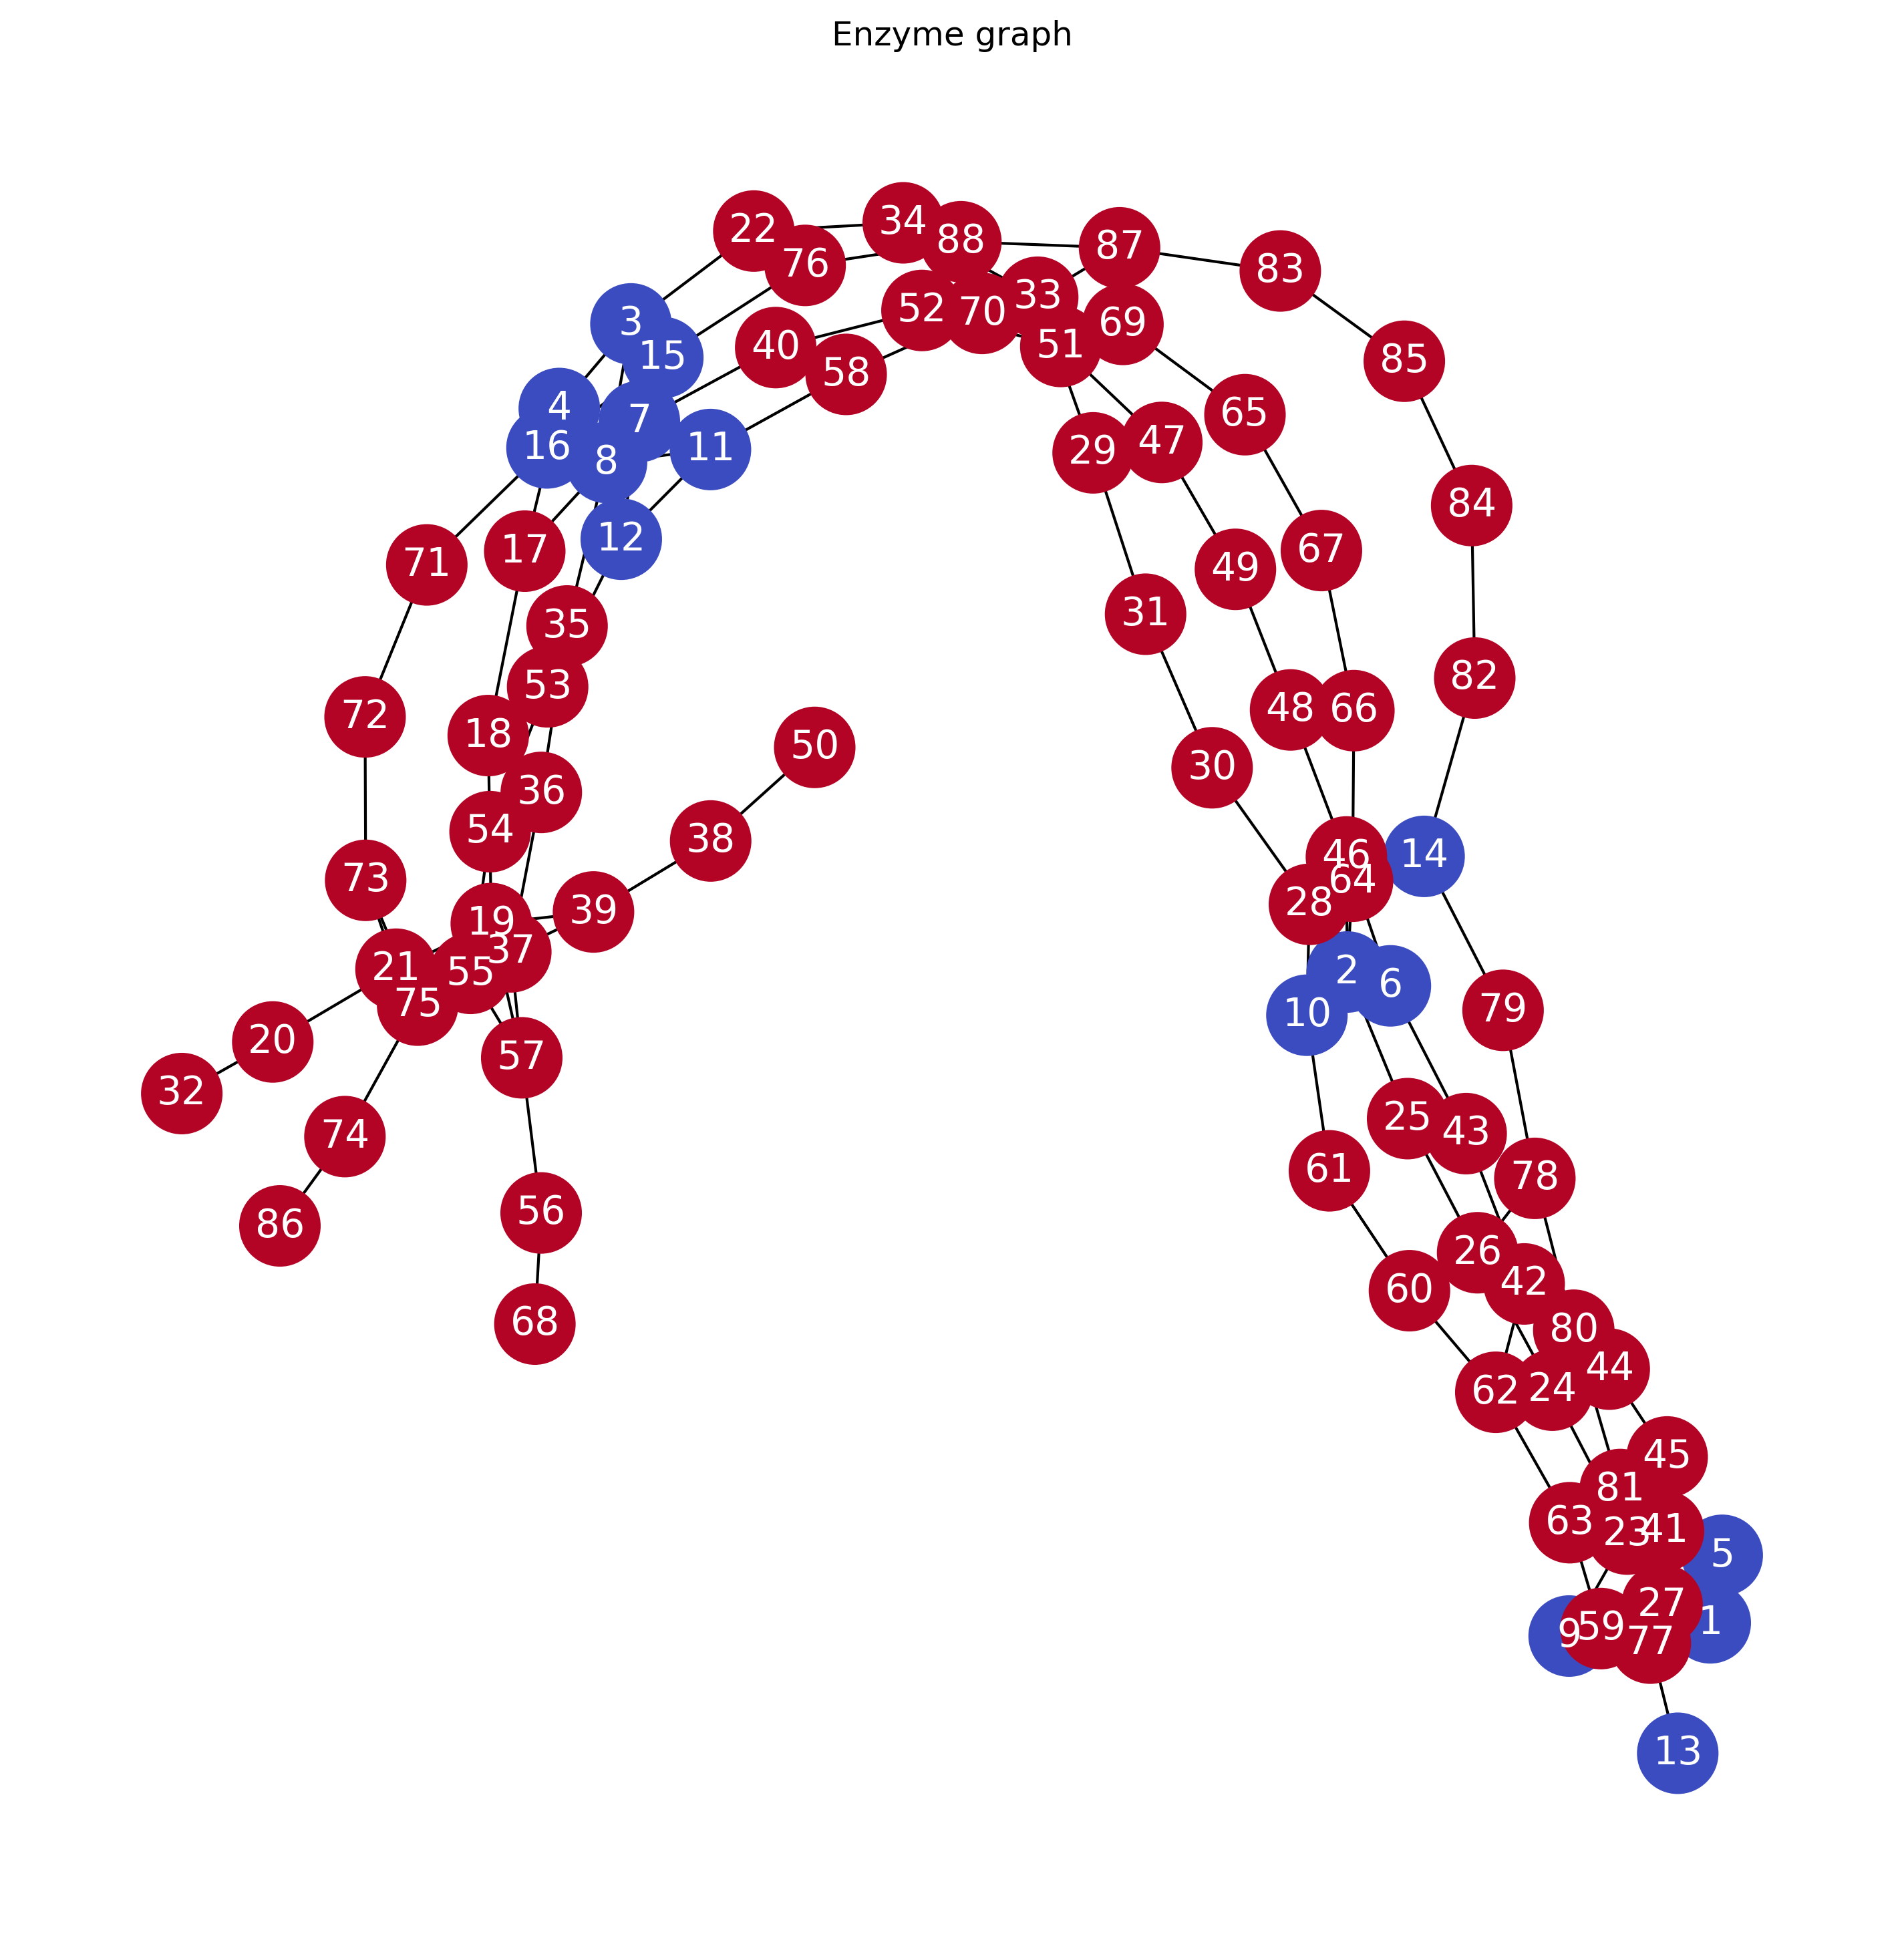

In [2]:


import networkx as nx
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd

enzyme_edge_data = pd.read_csv("networks/ENZYMES8.edges",header=0,delim_whitespace=True)
node_label_data = pd.read_csv("networks/ENZYMES8.node_labels",header=0,delim_whitespace=True)
G = nx.Graph()
labels = []
for row in node_label_data.values:
    #print(f"node {row[0]} is of class {row[1]}")
    G.add_node(row[0])
    labels.append(row[1])
G.add_edges_from(enzyme_edge_data.values)
plt.figure(figsize=(12,12), dpi=300); plt.ion
plt.axis('off')
plt.title("Enzyme graph")
#pos = nx.nx_agraph.graphviz_layout(G,prog='neato')
nx.draw_networkx(G, 
                pos = nx.fruchterman_reingold_layout(G), 
                #pos = nx.spring_layout(G), 
                #node_color='y',
                node_color=labels,
                node_size=800,
                cmap='coolwarm',
                font_size=14,
                font_color='white')


<BarContainer object of 7 artists>

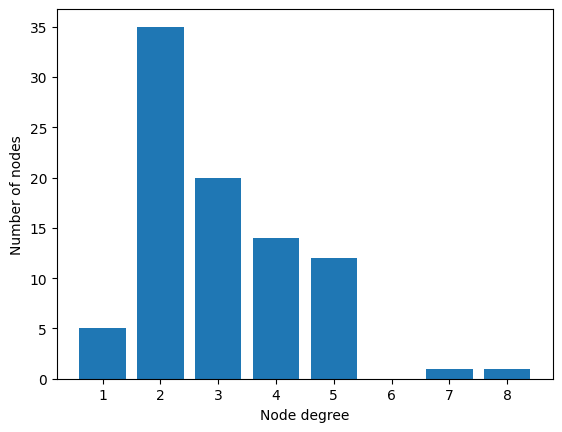

In [12]:
degree_list = [y for (x,y) in G.degree]
degree_count = Counter(degree_list)
fig, ax = plt.subplots()
ax.set_xlabel('Node degree')
ax.set_ylabel('Number of nodes')
plt.bar(degree_count.keys(),degree_count.values())

<BarContainer object of 115 artists>

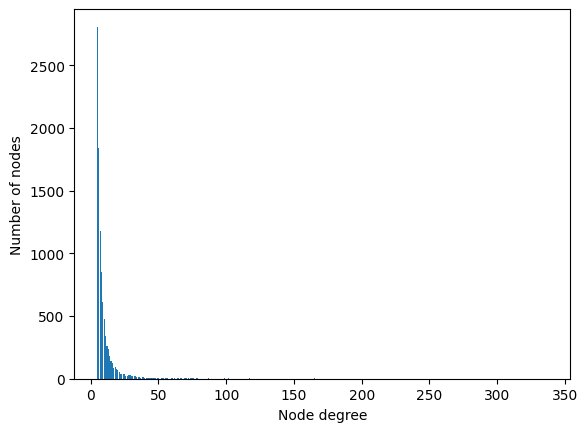

In [13]:
# repeat for a large graph
G = nx.barabasi_albert_graph(10000,5,seed=0)
degree_list = [y for (x,y) in G.degree]
degree_count = Counter(degree_list)
fig, ax = plt.subplots()
ax.set_xlabel('Node degree')
ax.set_ylabel('Number of nodes')
plt.bar(degree_count.keys(),degree_count.values())

ValueError: too many values to unpack (expected 2)

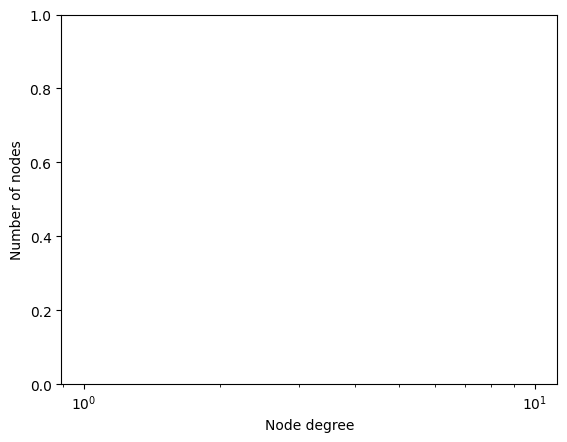

In [14]:
# repeat for a large graph but show scale free property
G = nx.barabasi_albert_graph(10000,5,seed=0)
degree_list = [y for (x,y) in G.degree]
degree_count = Counter(degree_list)
fig, ax = plt.subplots()
ax.set_xlabel('Node degree')
ax.set_ylabel('Number of nodes')
ax.set_xscale('log')
ax.set_yscale('log')
plt.bar(degree_count.keys(),degree_count.values())